# **Urban spatial order: street network orientation, configuration, and entropy : IE6400 Foundations of Data Analytics Project 1**


In [291]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [292]:
# Set working directory
%cd /content/drive/MyDrive/FDA/

/content/drive/MyDrive/FDA


In [ ]:
!pip install pandas

In [293]:
# Include Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

In [294]:
# Read and Display FDA Project data
df_urbanNetwork = pd.read_csv('FDA Project_1 Dataset.csv')
df_urbanNetwork

,Region,City,φ,Η o,Η w,ĩ,ς,k̅,P de,P 4w,Traffic Index,Gross Rental Yield City Centre,Gross Rental Yield Outside of Centre,Quality of life
0,Asia/Oceania,Bangkok,0.105,3.465,3.452,64.6,1.059,2.385,0.360,0.108,213.4,3.1,3.4,83.9
1,NaN,Beijing,0.335,3.177,3.206,177.5,1.053,2.985,0.135,0.241,180.8,1.6,1.6,104.9
2,NaN,Hanoi,0.010,3.573,3.572,64.4,1.065,2.610,0.246,0.102,104.0,3.7,4.1,99.4
3,NaN,Hong Kong,0.012,3.571,3.563,61.0,1.137,2.932,0.114,0.174,144.0,1.8,2.0,121.9
4,NaN,Jakarta,0.167,3.391,3.347,52.8,1.065,2.741,0.175,0.096,251.8,4.1,5.1,76.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,Seattle,0.723,2.542,2.474,97.2,1.028,3.107,0.136,0.369,226.0,NaN,NaN,177.4
96,NaN,St Louis,0.276,3.256,3.225,107.0,1.023,3.165,0.098,0.374,126.5,NaN,NaN,NaN
97,NaN,Toronto,0.474,2.980,2.885,103.1,1.090,2.994,0.109,0.217,198.5,3.9,4.1,145.9
98,NaN,Vancouver,0.749,2.488,2.413,103.7,1.022,3.308,0.073,0.455,160.3,3.7,4.6,156.1


In [295]:
# Verifying the column headers of the dataset
df_urbanNetwork.columns

Index(['Region', 'City', 'φ', 'Η o', 'Η w', 'ĩ', 'ς', 'k̅', 'P de', 'P 4w',
       'Traffic Index', 'Gross Rental Yield City Centre',
       'Gross Rental Yield Outside of Centre', 'Quality of life'],
      dtype='object')

In [296]:
#Checking the data types of each column
df_urbanNetwork.dtypes

Region                                   object
City                                     object
φ                                       float64
Η o                                     float64
Η w                                     float64
ĩ                                       float64
ς                                       float64
k̅                                      float64
P de                                    float64
P 4w                                    float64
Traffic Index                           float64
Gross Rental Yield City Centre          float64
Gross Rental Yield Outside of Centre    float64
Quality of life                         float64
dtype: object

In [297]:
#Checking for missing values in the Dataset
df_urbanNetwork.isna().sum()

Region                                  95
City                                     0
φ                                        0
Η o                                      0
Η w                                      0
ĩ                                        0
ς                                        0
k̅                                       0
P de                                     0
P 4w                                     0
Traffic Index                           21
Gross Rental Yield City Centre          32
Gross Rental Yield Outside of Centre    32
Quality of life                         20
dtype: int64

In [298]:
#Filling missing values in the Region and City column according to the dataset in particular locations
df_urbanNetwork.loc[1:22, 'Region'] = 'Asia/Oceania'
df_urbanNetwork.loc[23:47, 'Region'] = 'Europe'
df_urbanNetwork.loc[48:56, 'Region'] = 'Latin America'
df_urbanNetwork.loc[57:70, 'Region'] = 'Middle East/Africa'
df_urbanNetwork.loc[71:99, 'Region'] = 'US/Canada'

In [299]:
#Re-Checking if all the columns required for performing clustering are not having any missing values
df_urbanNetwork.isna().sum()

Region                                   0
City                                     0
φ                                        0
Η o                                      0
Η w                                      0
ĩ                                        0
ς                                        0
k̅                                       0
P de                                     0
P 4w                                     0
Traffic Index                           21
Gross Rental Yield City Centre          32
Gross Rental Yield Outside of Centre    32
Quality of life                         20
dtype: int64

In [300]:
#Extracting only columns with numerical values for performing clustering
df_urbanNetworkCol = df_urbanNetwork[['φ','Η o','Η w','ĩ','ς','k̅','P de','P 4w']]
df_urbanNetworkCol

,φ,Η o,Η w,ĩ,ς,k̅,P de,P 4w
0,0.105,3.465,3.452,64.6,1.059,2.385,0.360,0.108
1,0.335,3.177,3.206,177.5,1.053,2.985,0.135,0.241
2,0.010,3.573,3.572,64.4,1.065,2.610,0.246,0.102
3,0.012,3.571,3.563,61.0,1.137,2.932,0.114,0.174
4,0.167,3.391,3.347,52.8,1.065,2.741,0.175,0.096
...,...,...,...,...,...,...,...,...
95,0.723,2.542,2.474,97.2,1.028,3.107,0.136,0.369
96,0.276,3.256,3.225,107.0,1.023,3.165,0.098,0.374
97,0.474,2.980,2.885,103.1,1.090,2.994,0.109,0.217
98,0.749,2.488,2.413,103.7,1.022,3.308,0.073,0.455


In [301]:
# Performing Normalisation/ Scaling on the dataset: Min - Max scaling performed
#copy the data
df_min_max_scaled = df_urbanNetworkCol

# apply normalization techniques
for column in df_min_max_scaled.columns:
	df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())

# view normalized data
df_min_max_scaled


<ipython-input-301-1e8356c325be>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())


,φ,Η o,Η w,ĩ,ς,k̅,P de,P 4w
0,0.114827,0.921948,0.912720,0.197331,0.350365,0.030833,0.904891,0.091262
1,0.371237,0.729820,0.746279,0.735462,0.306569,0.530833,0.293478,0.349515
2,0.008919,0.993996,0.993911,0.196378,0.394161,0.218333,0.595109,0.079612
3,0.011148,0.992662,0.987821,0.180172,0.919708,0.486667,0.236413,0.219417
4,0.183946,0.872582,0.841678,0.141087,0.394161,0.327500,0.402174,0.067961
...,...,...,...,...,...,...,...,...
95,0.803790,0.306204,0.251015,0.352717,0.124088,0.632500,0.296196,0.598058
96,0.305463,0.782522,0.759134,0.399428,0.087591,0.680833,0.192935,0.607767
97,0.526198,0.598399,0.529093,0.380839,0.576642,0.538333,0.222826,0.302913
98,0.832776,0.270180,0.209743,0.383699,0.080292,0.800000,0.125000,0.765049


In [302]:
#Merging Region and City column from original dataset to the scaled dataset
extracted_col = df_urbanNetwork[['Region','City']]

# Add the extracted column to the second DataFrame
df_min_max_scaled = pd.concat([df_min_max_scaled, extracted_col],axis=1 )

# Display the second DataFrame after adding the column from the first DataFrame
display(df_min_max_scaled)

,φ,Η o,Η w,ĩ,ς,k̅,P de,P 4w,Region,City
0,0.114827,0.921948,0.912720,0.197331,0.350365,0.030833,0.904891,0.091262,Asia/Oceania,Bangkok
1,0.371237,0.729820,0.746279,0.735462,0.306569,0.530833,0.293478,0.349515,Asia/Oceania,Beijing
2,0.008919,0.993996,0.993911,0.196378,0.394161,0.218333,0.595109,0.079612,Asia/Oceania,Hanoi
3,0.011148,0.992662,0.987821,0.180172,0.919708,0.486667,0.236413,0.219417,Asia/Oceania,Hong Kong
4,0.183946,0.872582,0.841678,0.141087,0.394161,0.327500,0.402174,0.067961,Asia/Oceania,Jakarta
...,...,...,...,...,...,...,...,...,...,...
95,0.803790,0.306204,0.251015,0.352717,0.124088,0.632500,0.296196,0.598058,US/Canada,Seattle
96,0.305463,0.782522,0.759134,0.399428,0.087591,0.680833,0.192935,0.607767,US/Canada,St Louis
97,0.526198,0.598399,0.529093,0.380839,0.576642,0.538333,0.222826,0.302913,US/Canada,Toronto
98,0.832776,0.270180,0.209743,0.383699,0.080292,0.800000,0.125000,0.765049,US/Canada,Vancouver


In [303]:
#Preparing for applying clustering methods
# Set the desired DPI and font size
dpi = 300
font_size = 18

# Adjust the default settings for font size
plt.rcParams.update({'font.size': font_size})
df_min_max_scaled

,φ,Η o,Η w,ĩ,ς,k̅,P de,P 4w,Region,City
0,0.114827,0.921948,0.912720,0.197331,0.350365,0.030833,0.904891,0.091262,Asia/Oceania,Bangkok
1,0.371237,0.729820,0.746279,0.735462,0.306569,0.530833,0.293478,0.349515,Asia/Oceania,Beijing
2,0.008919,0.993996,0.993911,0.196378,0.394161,0.218333,0.595109,0.079612,Asia/Oceania,Hanoi
3,0.011148,0.992662,0.987821,0.180172,0.919708,0.486667,0.236413,0.219417,Asia/Oceania,Hong Kong
4,0.183946,0.872582,0.841678,0.141087,0.394161,0.327500,0.402174,0.067961,Asia/Oceania,Jakarta
...,...,...,...,...,...,...,...,...,...,...
95,0.803790,0.306204,0.251015,0.352717,0.124088,0.632500,0.296196,0.598058,US/Canada,Seattle
96,0.305463,0.782522,0.759134,0.399428,0.087591,0.680833,0.192935,0.607767,US/Canada,St Louis
97,0.526198,0.598399,0.529093,0.380839,0.576642,0.538333,0.222826,0.302913,US/Canada,Toronto
98,0.832776,0.270180,0.209743,0.383699,0.080292,0.800000,0.125000,0.765049,US/Canada,Vancouver


In [304]:
#KMeans clustering algorithm
from sklearn.cluster import KMeans
mdl = KMeans(n_clusters=3, n_init='auto')
mdl.fit(df_min_max_scaled.iloc[:,0:2])
print('SSE Data: '+ str(mdl.inertia_))

SSE Data: 0.8862666956743901


In [305]:
mdl.labels_

array([0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 2, 2, 0, 0, 1, 2, 2, 1, 1, 0, 2, 1, 2, 1, 1, 1, 2,
       0, 2, 2, 1, 0, 1, 2, 1, 2, 2, 1, 2], dtype=int32)

In [306]:
#Displaying the predicted class of Kmeans algo
df_min_max_scaled['predictedclass'] = mdl.labels_
df_min_max_scaled

,φ,Η o,Η w,ĩ,ς,k̅,P de,P 4w,Region,City,predictedclass
0,0.114827,0.921948,0.912720,0.197331,0.350365,0.030833,0.904891,0.091262,Asia/Oceania,Bangkok,0
1,0.371237,0.729820,0.746279,0.735462,0.306569,0.530833,0.293478,0.349515,Asia/Oceania,Beijing,2
2,0.008919,0.993996,0.993911,0.196378,0.394161,0.218333,0.595109,0.079612,Asia/Oceania,Hanoi,0
3,0.011148,0.992662,0.987821,0.180172,0.919708,0.486667,0.236413,0.219417,Asia/Oceania,Hong Kong,0
4,0.183946,0.872582,0.841678,0.141087,0.394161,0.327500,0.402174,0.067961,Asia/Oceania,Jakarta,0
...,...,...,...,...,...,...,...,...,...,...,...
95,0.803790,0.306204,0.251015,0.352717,0.124088,0.632500,0.296196,0.598058,US/Canada,Seattle,1
96,0.305463,0.782522,0.759134,0.399428,0.087591,0.680833,0.192935,0.607767,US/Canada,St Louis,2
97,0.526198,0.598399,0.529093,0.380839,0.576642,0.538333,0.222826,0.302913,US/Canada,Toronto,2
98,0.832776,0.270180,0.209743,0.383699,0.080292,0.800000,0.125000,0.765049,US/Canada,Vancouver,1


In [307]:
mdl.cluster_centers_

array([[0.05105253, 0.96517286],
       [0.77480491, 0.32900722],
       [0.36736211, 0.73128117]])

In [308]:
mdl.cluster_centers_[:, 0]

array([0.05105253, 0.77480491, 0.36736211])

In [309]:
#Performing elbow method to compute the value of K before applying KMeans algo
k = []
wcss = []
for i in range(1,10):
  mdl = KMeans(n_clusters=i, n_init=10)
  mdl.fit(df_min_max_scaled.iloc[:,0:2])
  k.append(i)
  wcss.append(mdl.inertia_)

<Axes: >

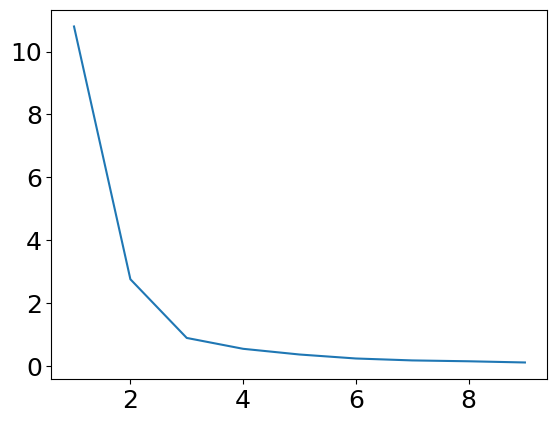

In [310]:
sns.lineplot(x = k, y = wcss)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


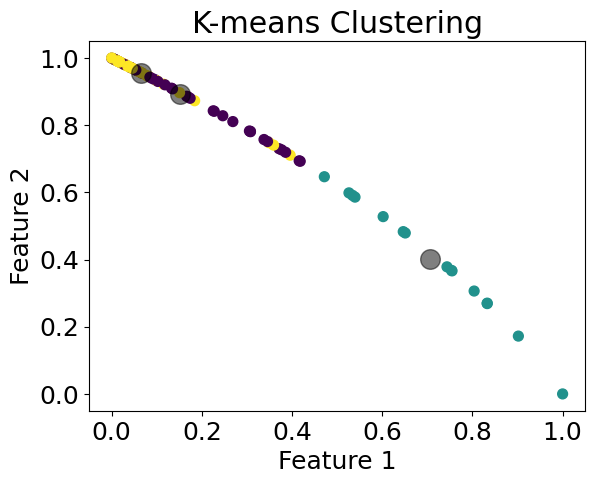

In [311]:
#KMeans Algorithm
X = np.array(df_min_max_scaled[['φ','Η o','Η w','ĩ','ς','k̅','P de','P 4w']])

# Specify the number of clusters
num_clusters = 3

# Create and fit the model
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(X)

# Predict the cluster for each data point
labels = kmeans.predict(X)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title("K-means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [312]:
metrics.silhouette_score(X, labels)

0.3604600443694045

<Figure size 1500x300 with 0 Axes>

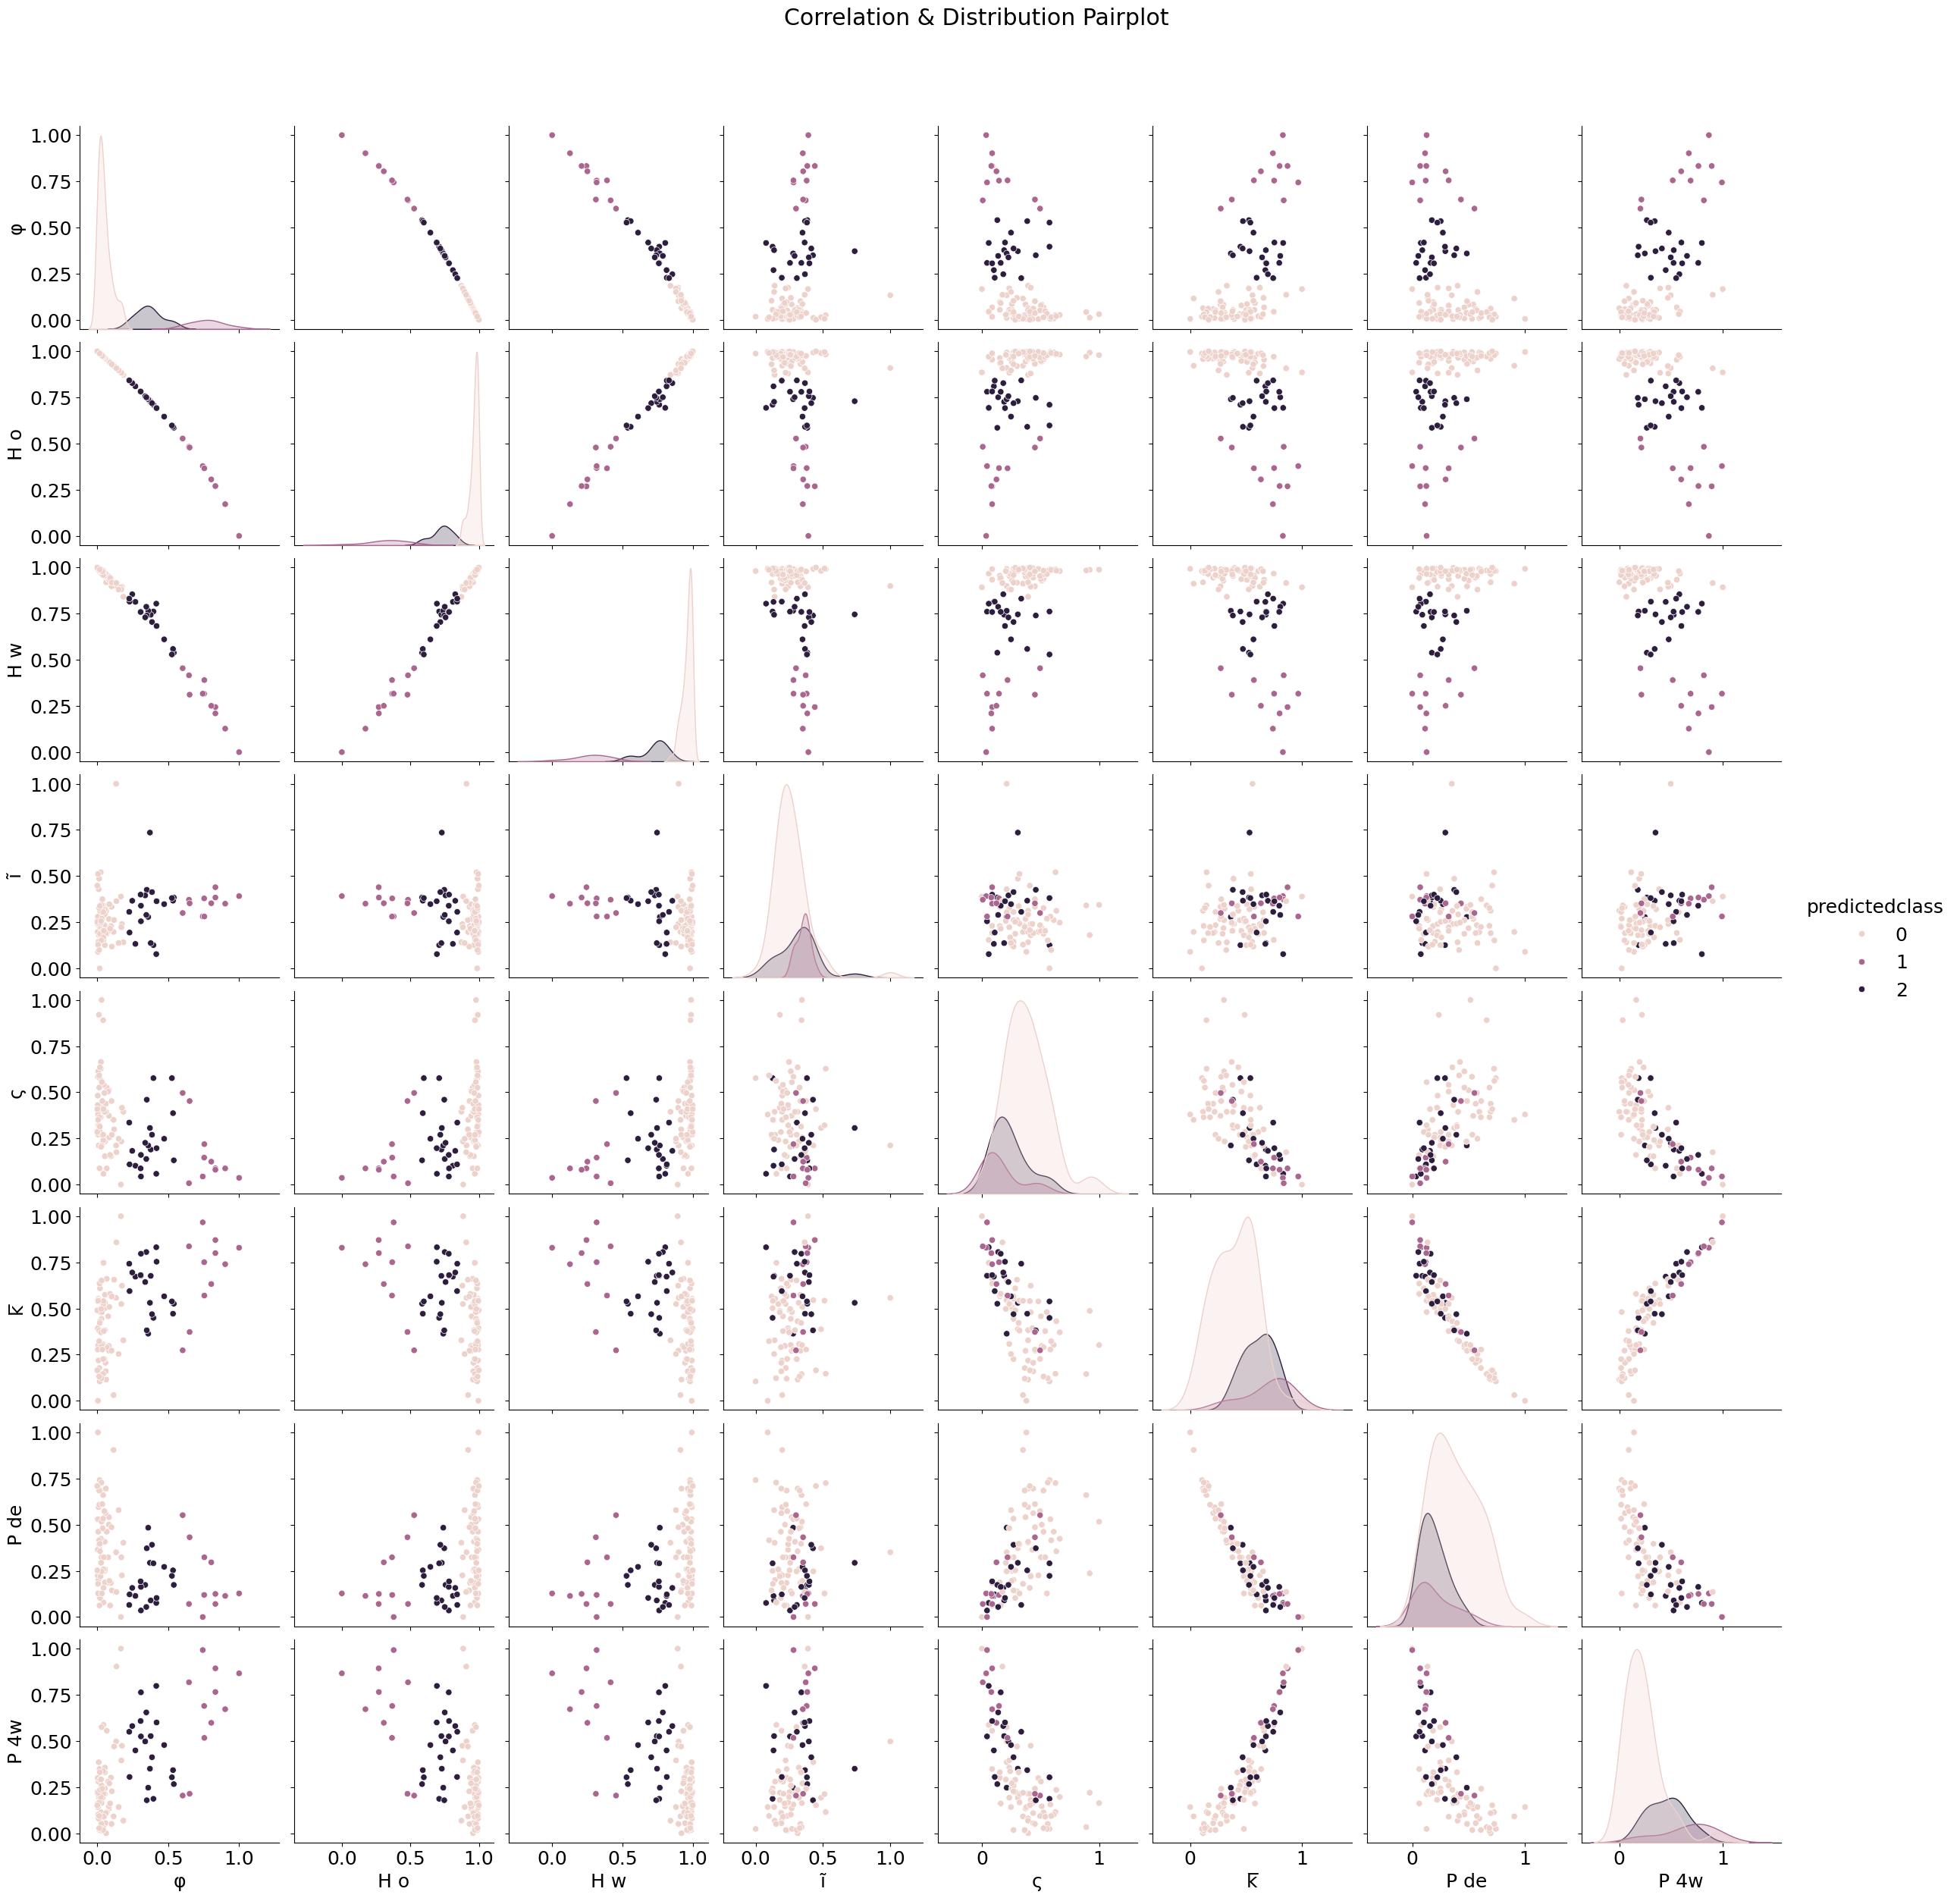

In [313]:
#Constructing pair plots for all the factors considered for KMeans algo
plt.figure(figsize = (15, 3))
sns.pairplot(df_min_max_scaled, hue = "predictedclass", height = 3)
plt.suptitle("Correlation & Distribution Pairplot", y=1.05)
plt.show()

In [314]:
#Performing Agglomerative Clustering on the Dataframe
from sklearn.cluster import AgglomerativeClustering
mdl = AgglomerativeClustering(n_clusters=3)
mdl.fit(df_min_max_scaled.iloc[:,0:4])
mdl.labels_

array([2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 1, 1, 2, 2, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1,
       2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 0, 1])

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [30.0, 30.0, 60.0, 60.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [145.0, 145.0, 155.0, 155.0],
  [122.5, 122.5, 150.0, 150.0],
  [92.5, 92.5, 136.25, 136.25],
  [45.0, 45.0, 114.375, 114.375],
  [175.0, 175.0, 185.0, 185.0],
  [195.0, 195.0, 205.0, 205.0],
  [180.0, 180.0, 200.0, 200.0],
  [215.0, 215.0, 225.0, 225.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [220.0, 220.0, 242.5, 242.5],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [272.5, 272.5, 302.5, 302.5],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0, 350.0, 350.0],
  [325.0, 325.0, 342.5, 342.5],
  [287.5, 287.5, 333.75, 333.75],
  [231.25, 231.25, 310.625, 310.625],
  [190.0, 190.0, 2

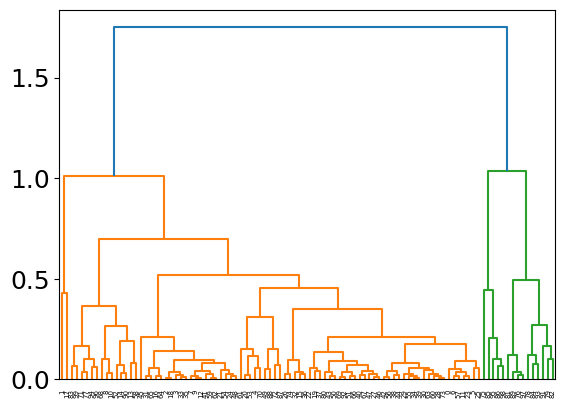

In [315]:
#Performing hierarchical clustering to generate dendograms for 'Complete' linkage criteria
from scipy.cluster.hierarchy import dendrogram, linkage
z = linkage(df_min_max_scaled.iloc[:,0:4], method = 'complete')
dendrogram(z)

{'icoord': [[45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [145.0, 145.0, 162.5, 162.5],
  [135.0, 135.0, 153.75, 153.75],
  [125.0, 125.0, 144.375, 144.375],
  [102.5, 102.5, 134.6875, 134.6875],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [185.0, 185.0, 202.5, 202.5],
  [118.59375, 118.59375, 193.75, 193.75],
  [225.0, 225.0, 235.0, 235.0],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [305.0, 305.0, 315.0, 315.0],
  [325.0, 325.0, 335.0, 335.0],
  [355.0, 355.0, 365.0, 365.0],
  [345.0, 345.0, 360.0, 360.0],
  [330.0, 330.0, 352.5, 352.5],
  [395.0, 395.0, 405.0, 405.0],
  [435.0, 435.0, 445.0, 445.0],
  [465.0, 465.0, 475.0, 475.0],
  [495.0, 495.0, 505.0, 505.0],
  [545.0, 545.0, 555.0, 555.0],
  [535.0, 535.0, 550.0, 550.0],
  [525.0, 525.0, 542.5, 54

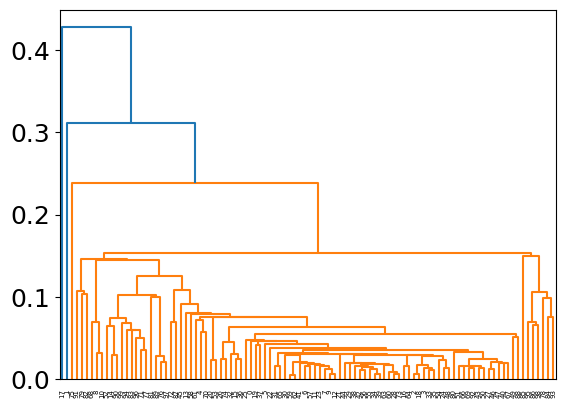

In [316]:
#Performing hierarchical clustering to generate dendograms for 'Single' linkage criteria
from scipy.cluster.hierarchy import dendrogram, linkage
z = linkage(df_min_max_scaled.iloc[:,0:4], method = 'single')
dendrogram(z)

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [15.0, 15.0, 32.5, 32.5],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [62.5, 62.5, 92.5, 92.5],
  [23.75, 23.75, 77.5, 77.5],
  [5.0, 5.0, 50.625, 50.625],
  [115.0, 115.0, 125.0, 125.0],
  [135.0, 135.0, 145.0, 145.0],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [140.0, 140.0, 162.5, 162.5],
  [195.0, 195.0, 205.0, 205.0],
  [215.0, 215.0, 225.0, 225.0],
  [200.0, 200.0, 220.0, 220.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [235.0, 235.0, 252.5, 252.5],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [275.0, 275.0, 292.5, 292.5],
  [243.75, 243.75, 283.75, 283.75],
  [210.0, 210.0, 263.75, 263.75],
  [325.0, 325.0, 335.0, 335.0],
  [355.0, 355.0, 365.0, 365.0],
  [345.0, 345.0, 360.0, 360.0],
  [330.0, 330.0, 352.5, 352.5],
  [315.0, 315.0, 341.25, 341.25],
  [385.0, 385.0, 395.0

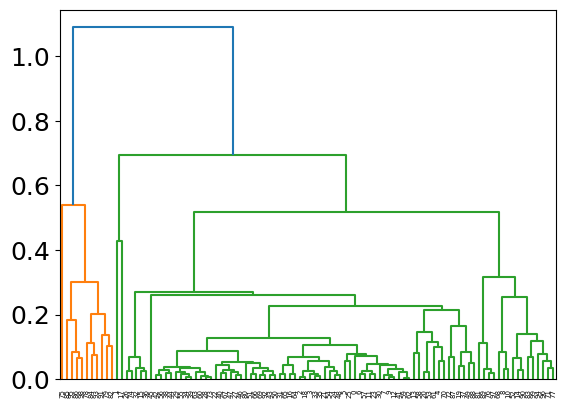

In [317]:
#Performing hierarchical clustering to generate dendograms for 'Average' linkage criteria
from scipy.cluster.hierarchy import dendrogram, linkage
z = linkage(df_min_max_scaled.iloc[:,0:4], method = 'average')
dendrogram(z)

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [12.5, 12.5, 42.5, 42.5],
  [65.0, 65.0, 75.0, 75.0],
  [27.5, 27.5, 70.0, 70.0],
  [85.0, 85.0, 95.0, 95.0],
  [105.0, 105.0, 115.0, 115.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [110.0, 110.0, 132.5, 132.5],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [175.0, 175.0, 192.5, 192.5],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [245.0, 245.0, 262.5, 262.5],
  [222.5, 222.5, 253.75, 253.75],
  [183.75, 183.75, 238.125, 238.125],
  [165.0, 165.0, 210.9375, 210.9375],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [325.0, 325.0, 335.0, 335.0],
  [355.0, 355.0, 365.0, 365.0],
  [345.0, 345.0, 360.0, 360.0],
  [330.0, 330.0, 352.5, 352.5],
  [375.0, 375.0, 385.0, 385.0],
  [395.0, 395.0, 405.0, 405.0],
  [415.0, 415.0, 4

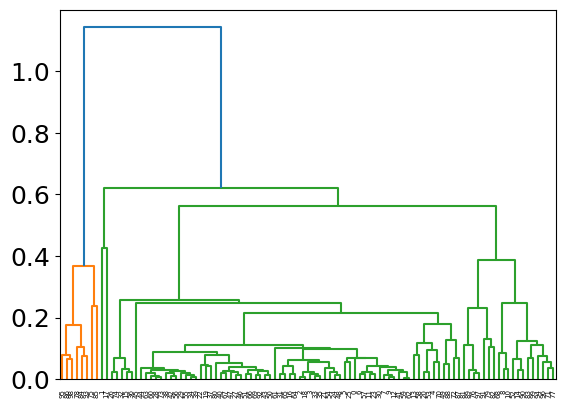

In [318]:
#Performing hierarchical clustering to generate dendograms for 'Centroid' linkage criteria, but this cannot be used incase of this class of dataset
from scipy.cluster.hierarchy import dendrogram, linkage
z = linkage(df_min_max_scaled.iloc[:,0:4], method = 'centroid')
dendrogram(z)

In [319]:
#Merging the clustered data along with other attributes in the dataset considered for further data analysis

df_min_max_scaledCol = df_urbanNetwork[['Traffic Index', 'Gross Rental Yield City Centre',
       'Gross Rental Yield Outside of Centre', 'Quality of life']]

# Add the extracted column to the second DataFrame
df_min_max_scaled = pd.concat([df_min_max_scaled, df_min_max_scaledCol],axis=1 )

# Display the second DataFrame after adding the column from the first DataFrame
display(df_min_max_scaled)

,φ,Η o,Η w,ĩ,ς,k̅,P de,P 4w,Region,City,predictedclass,Traffic Index,Gross Rental Yield City Centre,Gross Rental Yield Outside of Centre,Quality of life
0,0.114827,0.921948,0.912720,0.197331,0.350365,0.030833,0.904891,0.091262,Asia/Oceania,Bangkok,0,213.4,3.1,3.4,83.9
1,0.371237,0.729820,0.746279,0.735462,0.306569,0.530833,0.293478,0.349515,Asia/Oceania,Beijing,2,180.8,1.6,1.6,104.9
2,0.008919,0.993996,0.993911,0.196378,0.394161,0.218333,0.595109,0.079612,Asia/Oceania,Hanoi,0,104.0,3.7,4.1,99.4
3,0.011148,0.992662,0.987821,0.180172,0.919708,0.486667,0.236413,0.219417,Asia/Oceania,Hong Kong,0,144.0,1.8,2.0,121.9
4,0.183946,0.872582,0.841678,0.141087,0.394161,0.327500,0.402174,0.067961,Asia/Oceania,Jakarta,0,251.8,4.1,5.1,76.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.803790,0.306204,0.251015,0.352717,0.124088,0.632500,0.296196,0.598058,US/Canada,Seattle,1,226.0,NaN,NaN,177.4
96,0.305463,0.782522,0.759134,0.399428,0.087591,0.680833,0.192935,0.607767,US/Canada,St Louis,2,126.5,NaN,NaN,NaN
97,0.526198,0.598399,0.529093,0.380839,0.576642,0.538333,0.222826,0.302913,US/Canada,Toronto,2,198.5,3.9,4.1,145.9
98,0.832776,0.270180,0.209743,0.383699,0.080292,0.800000,0.125000,0.765049,US/Canada,Vancouver,1,160.3,3.7,4.6,156.1


In [320]:
#Removing the rows with missing values from the additionally added attribute columns for comparison
df_min_max_scaled.isna().sum()
df_new_min_max_scaled = df_min_max_scaled.dropna()
df_new_min_max_scaled

,φ,Η o,Η w,ĩ,ς,k̅,P de,P 4w,Region,City,predictedclass,Traffic Index,Gross Rental Yield City Centre,Gross Rental Yield Outside of Centre,Quality of life
0,0.114827,0.921948,0.912720,0.197331,0.350365,0.030833,0.904891,0.091262,Asia/Oceania,Bangkok,0,213.4,3.1,3.4,83.9
1,0.371237,0.729820,0.746279,0.735462,0.306569,0.530833,0.293478,0.349515,Asia/Oceania,Beijing,2,180.8,1.6,1.6,104.9
2,0.008919,0.993996,0.993911,0.196378,0.394161,0.218333,0.595109,0.079612,Asia/Oceania,Hanoi,0,104.0,3.7,4.1,99.4
3,0.011148,0.992662,0.987821,0.180172,0.919708,0.486667,0.236413,0.219417,Asia/Oceania,Hong Kong,0,144.0,1.8,2.0,121.9
4,0.183946,0.872582,0.841678,0.141087,0.394161,0.327500,0.402174,0.067961,Asia/Oceania,Jakarta,0,251.8,4.1,5.1,76.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.901895,0.172115,0.127199,0.350334,0.087591,0.740000,0.114130,0.671845,US/Canada,Miami,1,207.2,9.9,11.3,153.7
93,0.754738,0.366244,0.390392,0.280744,0.218978,0.570000,0.323370,0.516505,US/Canada,Portland,1,181.3,7.0,8.6,164.0
94,0.307692,0.780520,0.759811,0.339371,0.160584,0.796667,0.163043,0.763107,US/Canada,San Francisco,2,268.7,5.8,5.4,153.3
97,0.526198,0.598399,0.529093,0.380839,0.576642,0.538333,0.222826,0.302913,US/Canada,Toronto,2,198.5,3.9,4.1,145.9


In [321]:
#Grouping the data with respect to different predicted classes for further analysis
group = df_new_min_max_scaled.groupby('predictedclass')
group.first()

,φ,Η o,Η w,ĩ,ς,k̅,P de,P 4w,Region,City,Traffic Index,Gross Rental Yield City Centre,Gross Rental Yield Outside of Centre,Quality of life
predictedclass,,,,,,,,,,,,,,
0,0.114827,0.921948,0.912720,0.197331,0.350365,0.030833,0.904891,0.091262,Asia/Oceania,Bangkok,213.4,3.1,3.4,83.9
1,0.753623,0.367578,0.316644,0.378932,0.145985,0.750833,0.119565,0.689320,US/Canada,Denver,174.8,8.9,9.6,160.0
2,0.371237,0.729820,0.746279,0.735462,0.306569,0.530833,0.293478,0.349515,Asia/Oceania,Beijing,180.8,1.6,1.6,104.9


In [ ]:
#Generating groups of data according to the predicted class 0,1,2 from the Dataframe
group_0 = group.get_group(0)
group_0

group_1 = group.get_group(1)
group_1

group_2 = group.get_group(2)
group_2

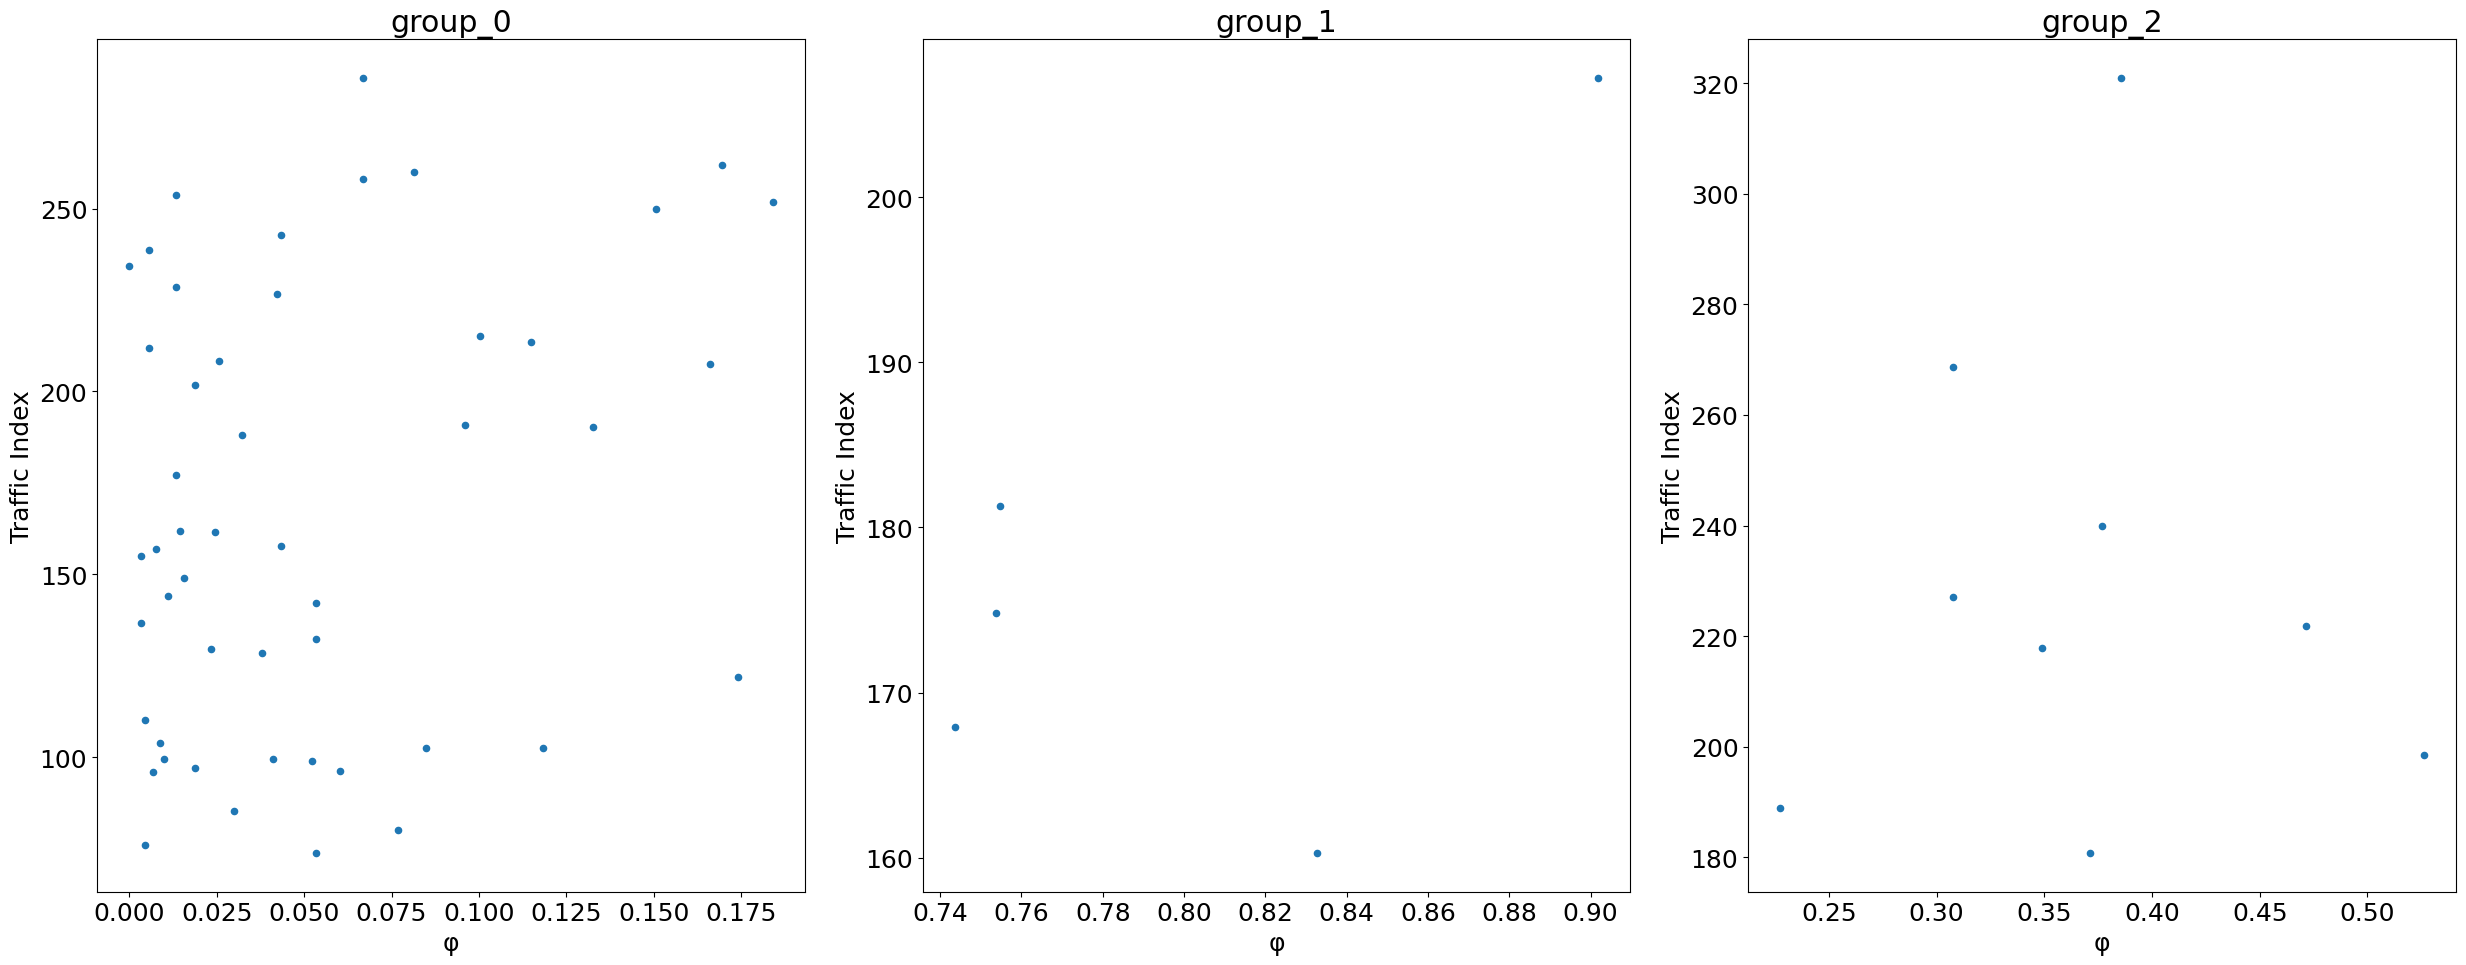

In [323]:
#plotting scatter plots for 'Traffic Index' against 'φ'

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 10))

#Plot scatter plots for each predicted class
Traffic_Index = group_0.plot.scatter(x='φ', y = 'Traffic Index', ax=axes[0])
Traffic_Index1 = group_1.plot.scatter(x='φ', y = 'Traffic Index', ax=axes[1])
Traffic_Index2 = group_2.plot.scatter(x='φ', y = 'Traffic Index', ax=axes[2])

# Set titles for subplots
axes[0].set_title('group_0')
axes[1].set_title('group_1')
axes[2].set_title('group_2')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# From the above Scatter Plots the following points are observed :

1. More number of cities under the cluster 0 have values lesser than 0.050 which shows more number of disordered cities in this cluster
2. Cluster 1 has better ordered cities when compared to cluster 0
3. Cluster 2 also has better ordered cities when compared to cluster 0

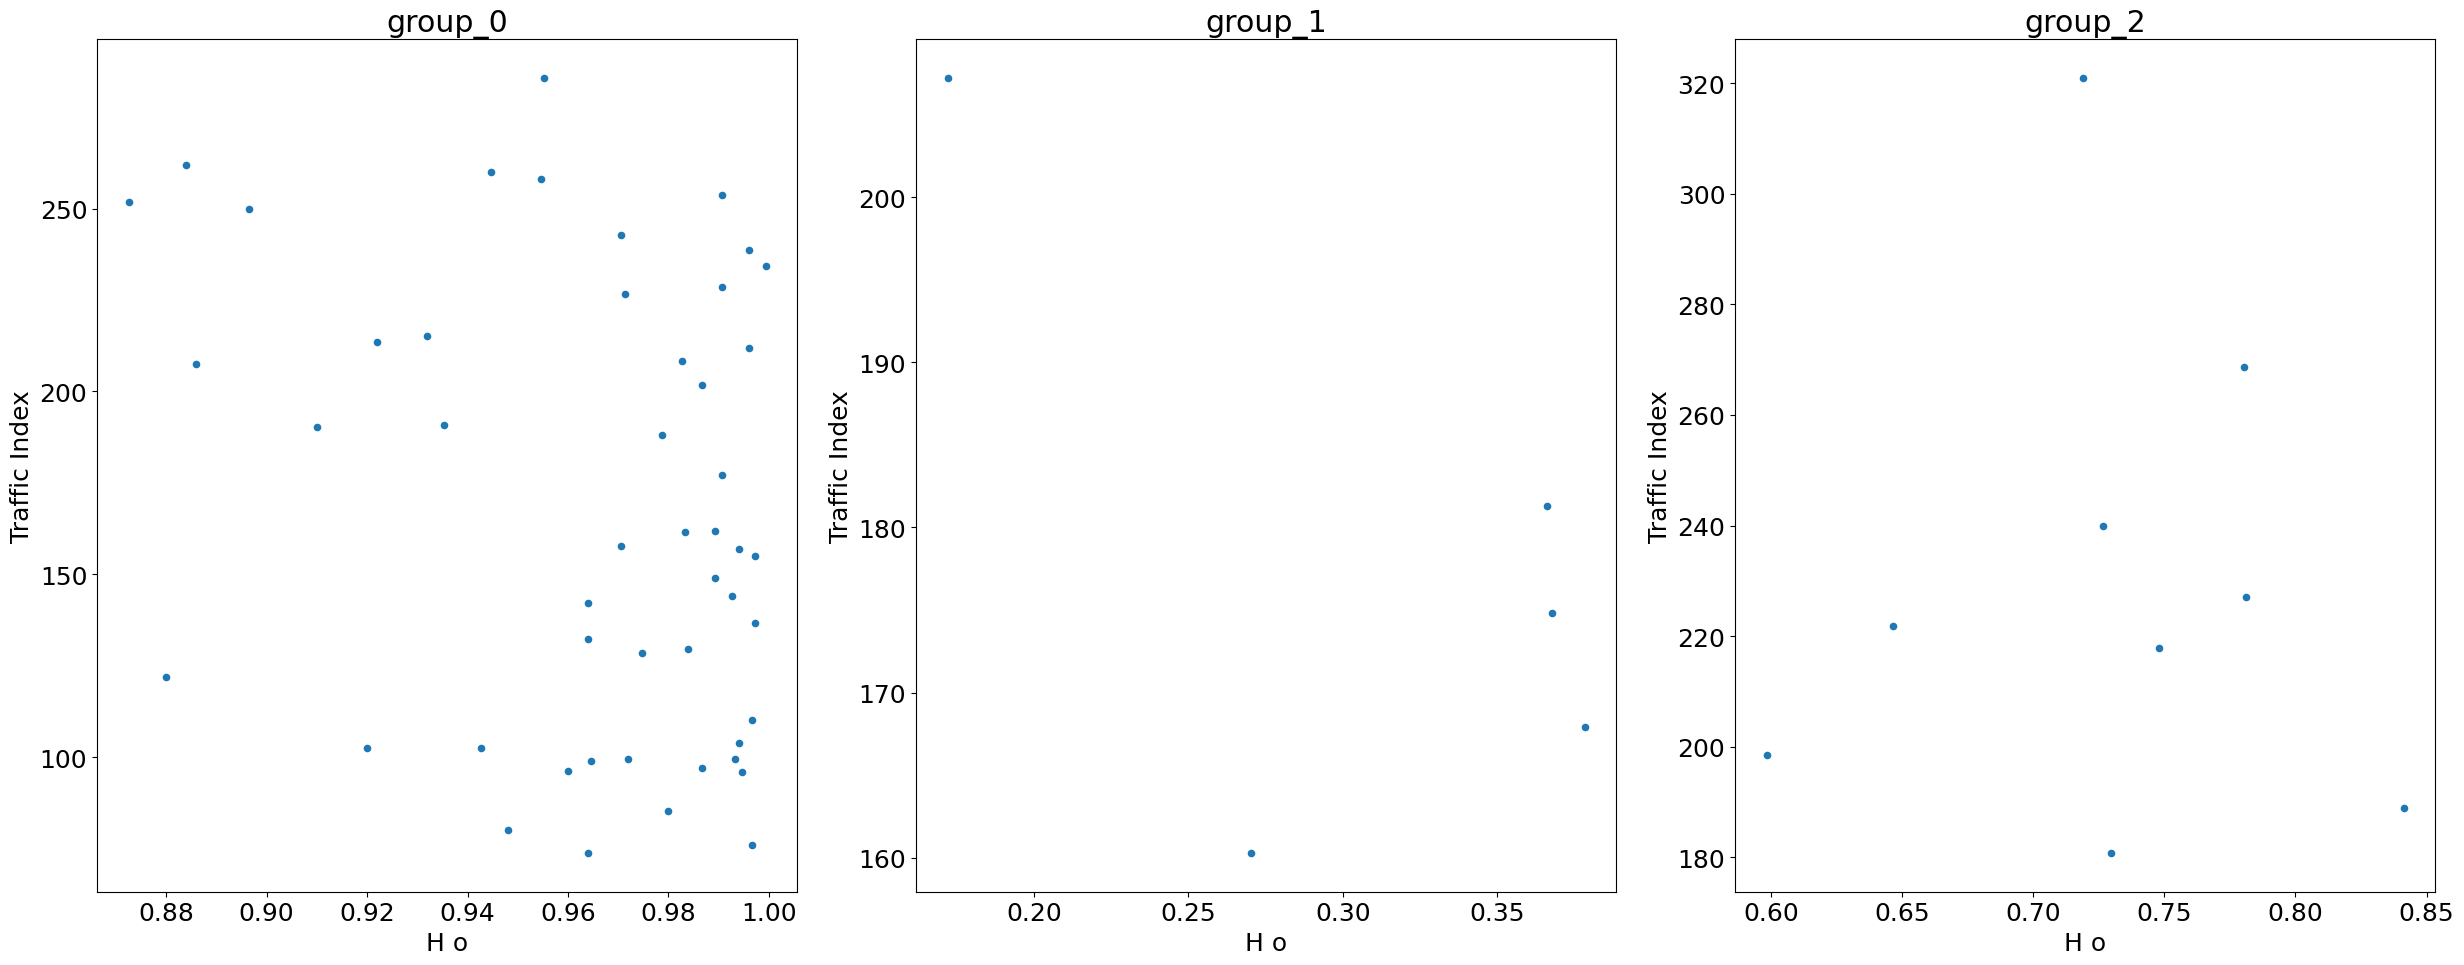

In [324]:
#plotting scatter plots for 'Traffic Index' against 'Η o'

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 10))

#Plot scatter plots for each predicted class
Traffic_Index = group_0.plot.scatter(x='Η o', y = 'Traffic Index', ax=axes[0])
Traffic_Index1 = group_1.plot.scatter(x='Η o', y = 'Traffic Index', ax=axes[1])
Traffic_Index2 = group_2.plot.scatter(x='Η o', y = 'Traffic Index', ax=axes[2])

# Set titles for subplots
axes[0].set_title('group_0')
axes[1].set_title('group_1')
axes[2].set_title('group_2')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# From the above Scatter Plots the following points are observed :

1. Most of the cities in cluster 0 have lowest orientation entropy.
2. The cities under cluster 1 have moderate orientation entropy
3. The cities under cluster 2 have high orientation entropy

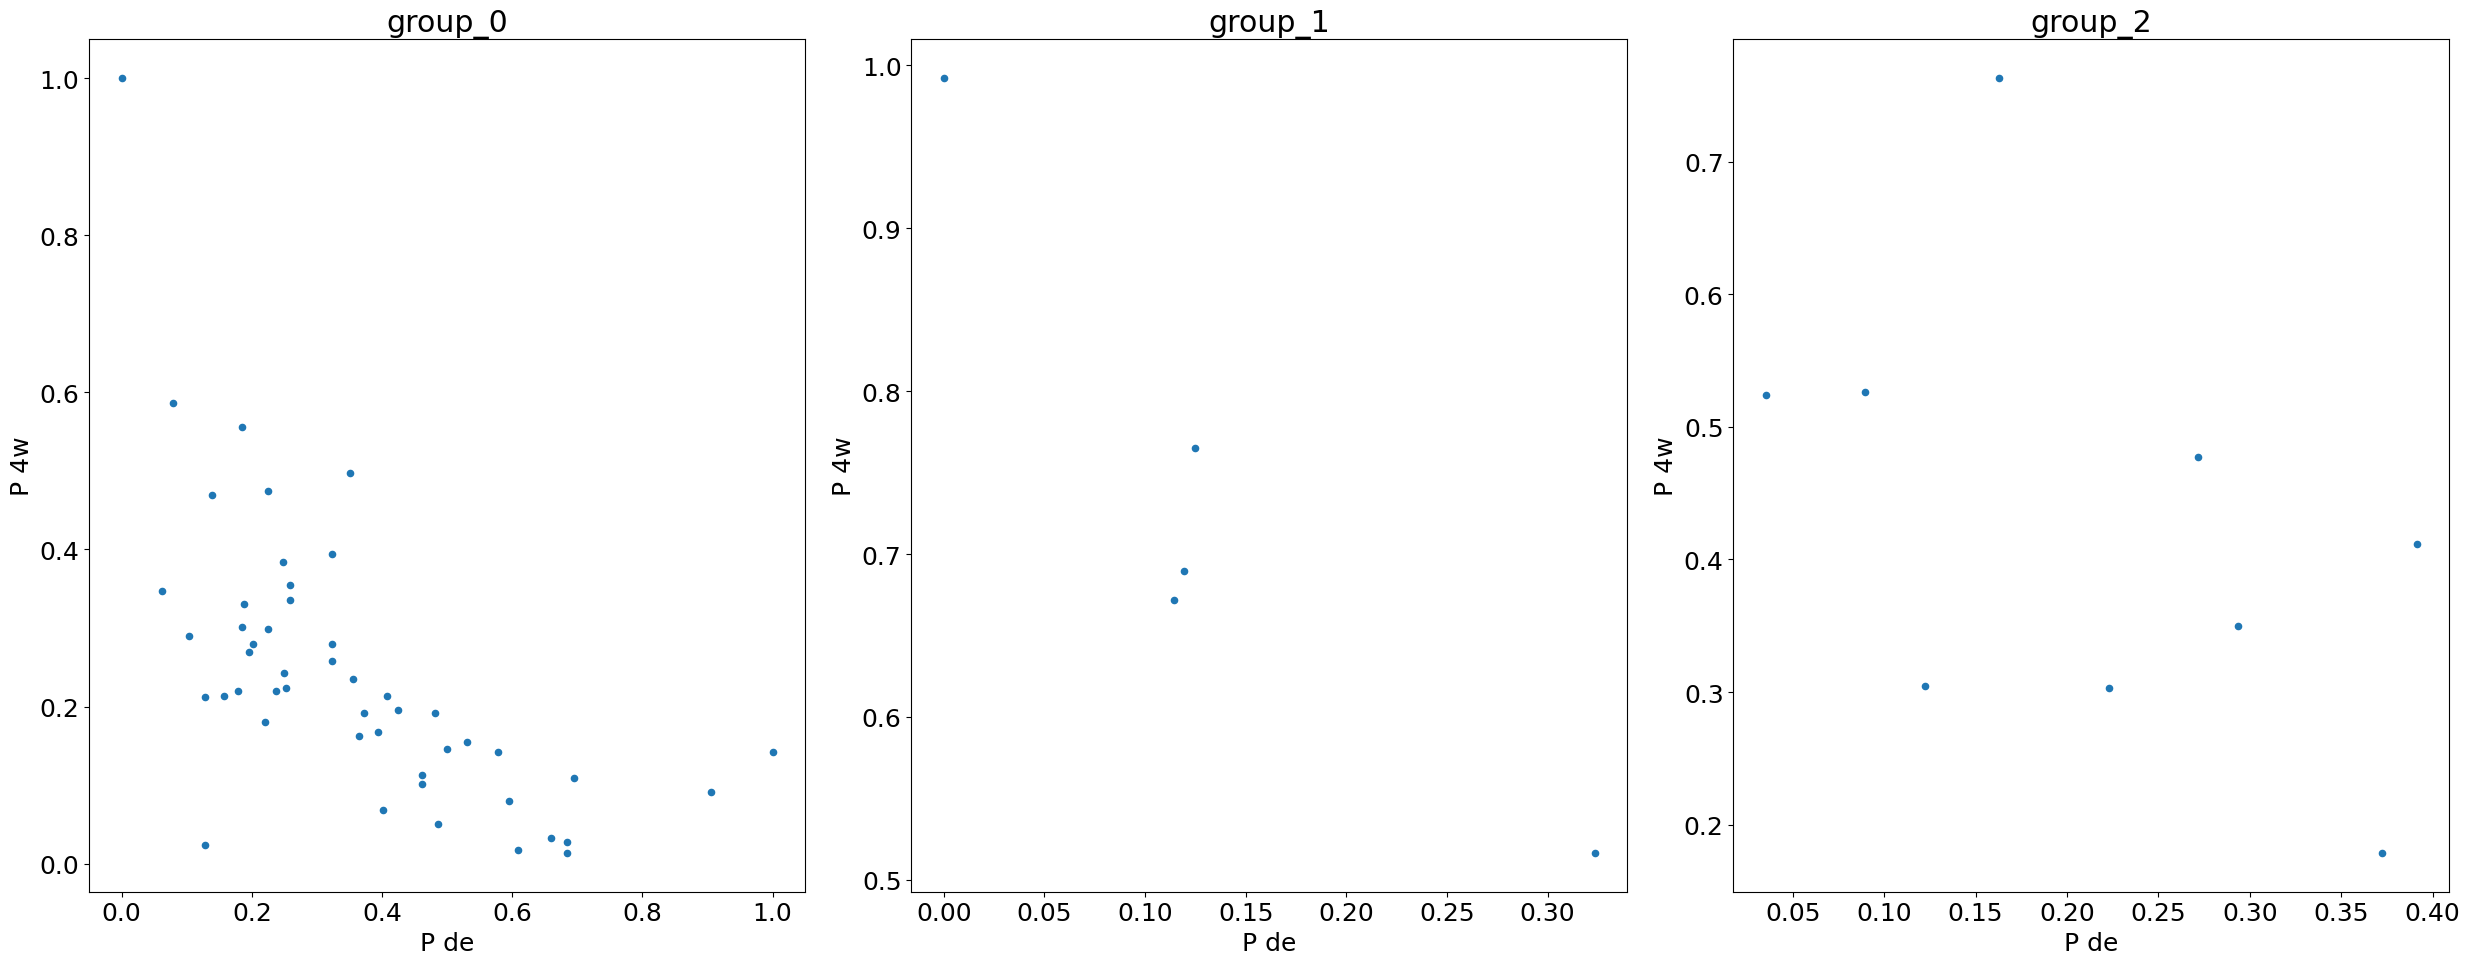

In [325]:
#plotting scatter plots for 'P de' against 'P 4w 	'

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 10))

#Plot scatter plots for each predicted class
Traffic_Index = group_0.plot.scatter(x='P de', y = 'P 4w', ax=axes[0])
Traffic_Index1 = group_1.plot.scatter(x='P de', y = 'P 4w', ax=axes[1])
Traffic_Index2 = group_2.plot.scatter(x='P de', y = 'P 4w', ax=axes[2])

# Set titles for subplots
axes[0].set_title('group_0')
axes[1].set_title('group_1')
axes[2].set_title('group_2')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# From the above Scatter Plots the following points are observed :

1. Most of the cities in cluster 0 have higher P de and higher P 4w values when compared to cities in the other clusters .
2. The cities under cluster 1 have lower P de and slightly higher P 4w values which is better for street orientations
3. The cities under cluster 2 have lower P de and lower P 4w values

<ipython-input-326-e1b4516cf758>:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=group_2["Traffic Index"], hue=group_2["Region"], ax=axes[2] )


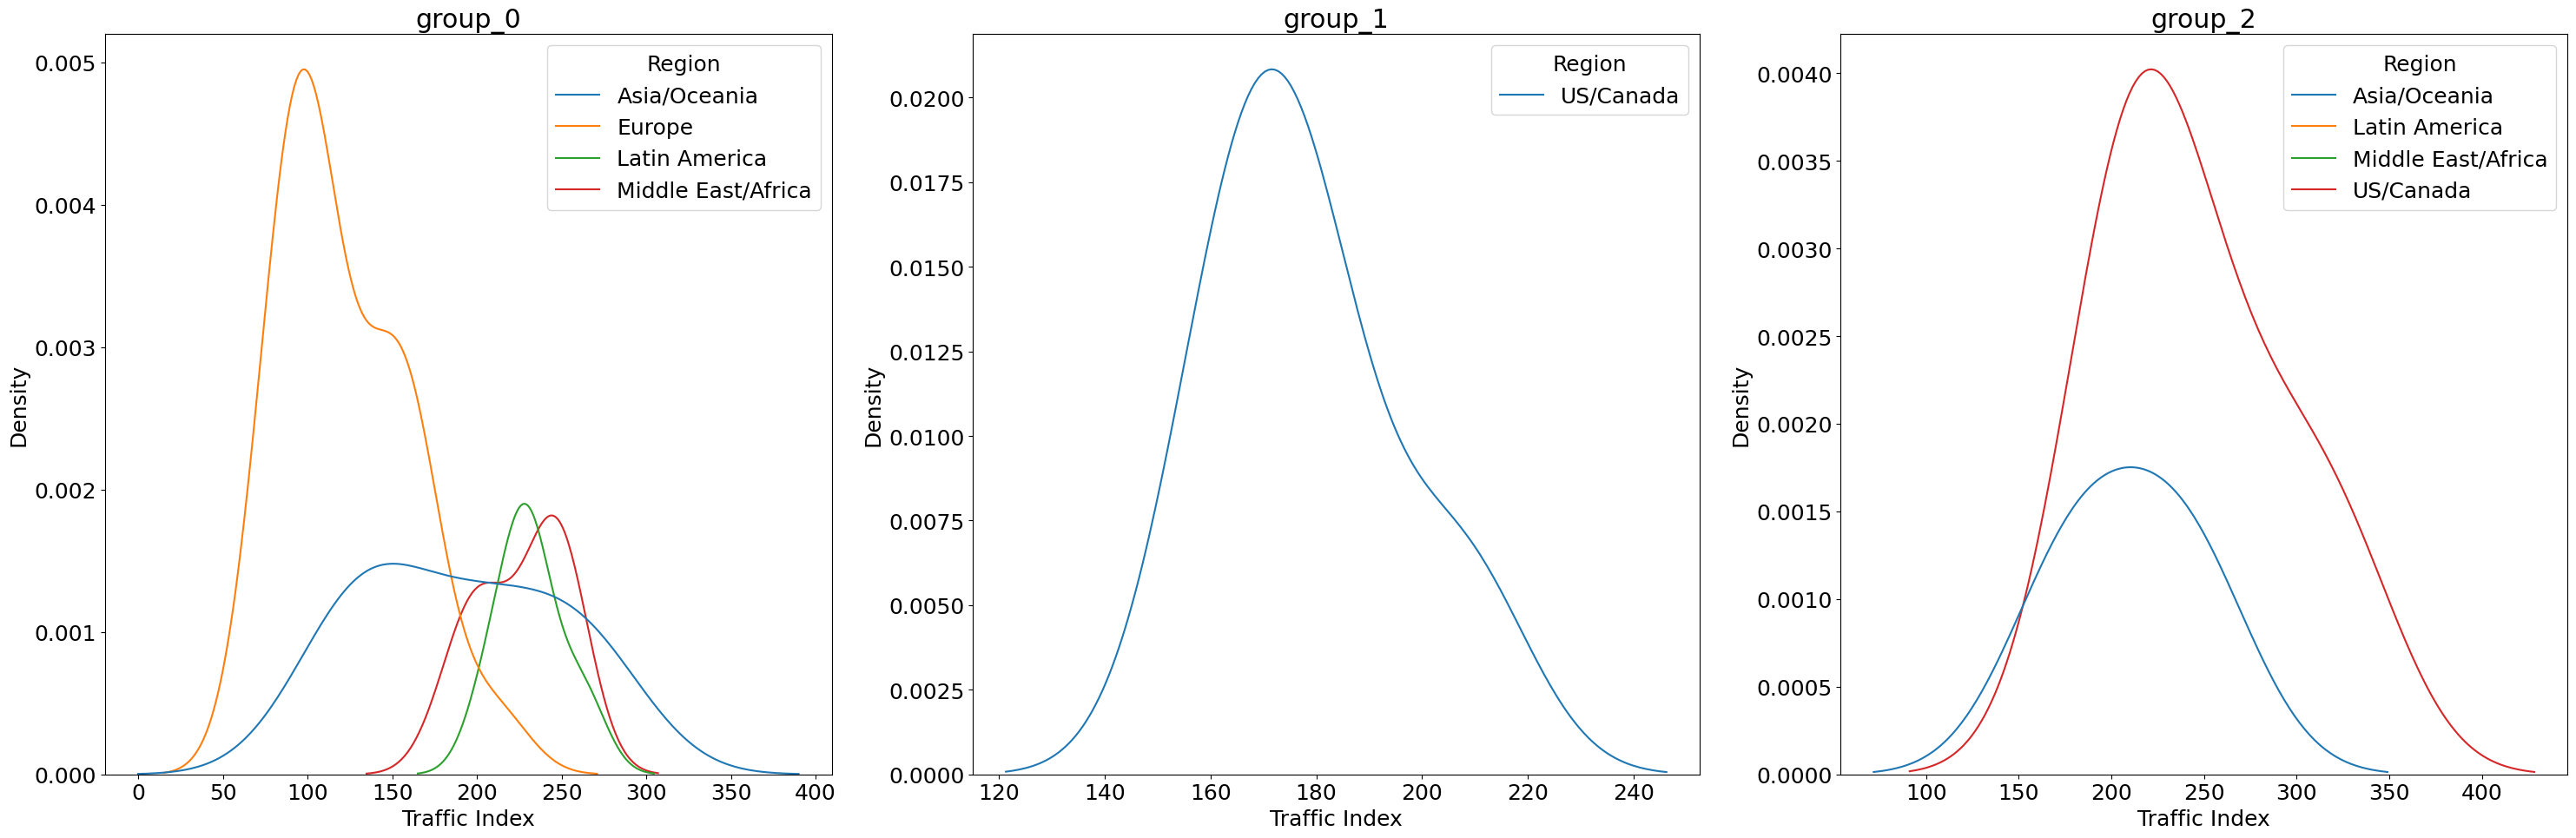

In [326]:
#plotting kde plots for 'Traffic Index' against 'Region'

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))

#Plot kde plots for each predicted class
sns.kdeplot(x=group_0["Traffic Index"], hue=group_0["Region"], ax=axes[0] )
sns.kdeplot(x=group_1["Traffic Index"], hue=group_1["Region"], ax=axes[1] )
sns.kdeplot(x=group_2["Traffic Index"], hue=group_2["Region"], ax=axes[2] )

# Set titles for subplots
axes[0].set_title('group_0')
axes[1].set_title('group_1')
axes[2].set_title('group_2')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# From the above Kde Plots the following points are observed :

1.  The Traffic index in the cluster 0 is highest for mostly Eurpoean cities followed by cities in Latin America
2.  The cities in cluster 1 are majorly from US/Canada region and have the second highest Traffic index among all three clusters
3.  In the cluster 2 cities with highest traffic index are again the cities from US/Canada with the highest values among all three clusters

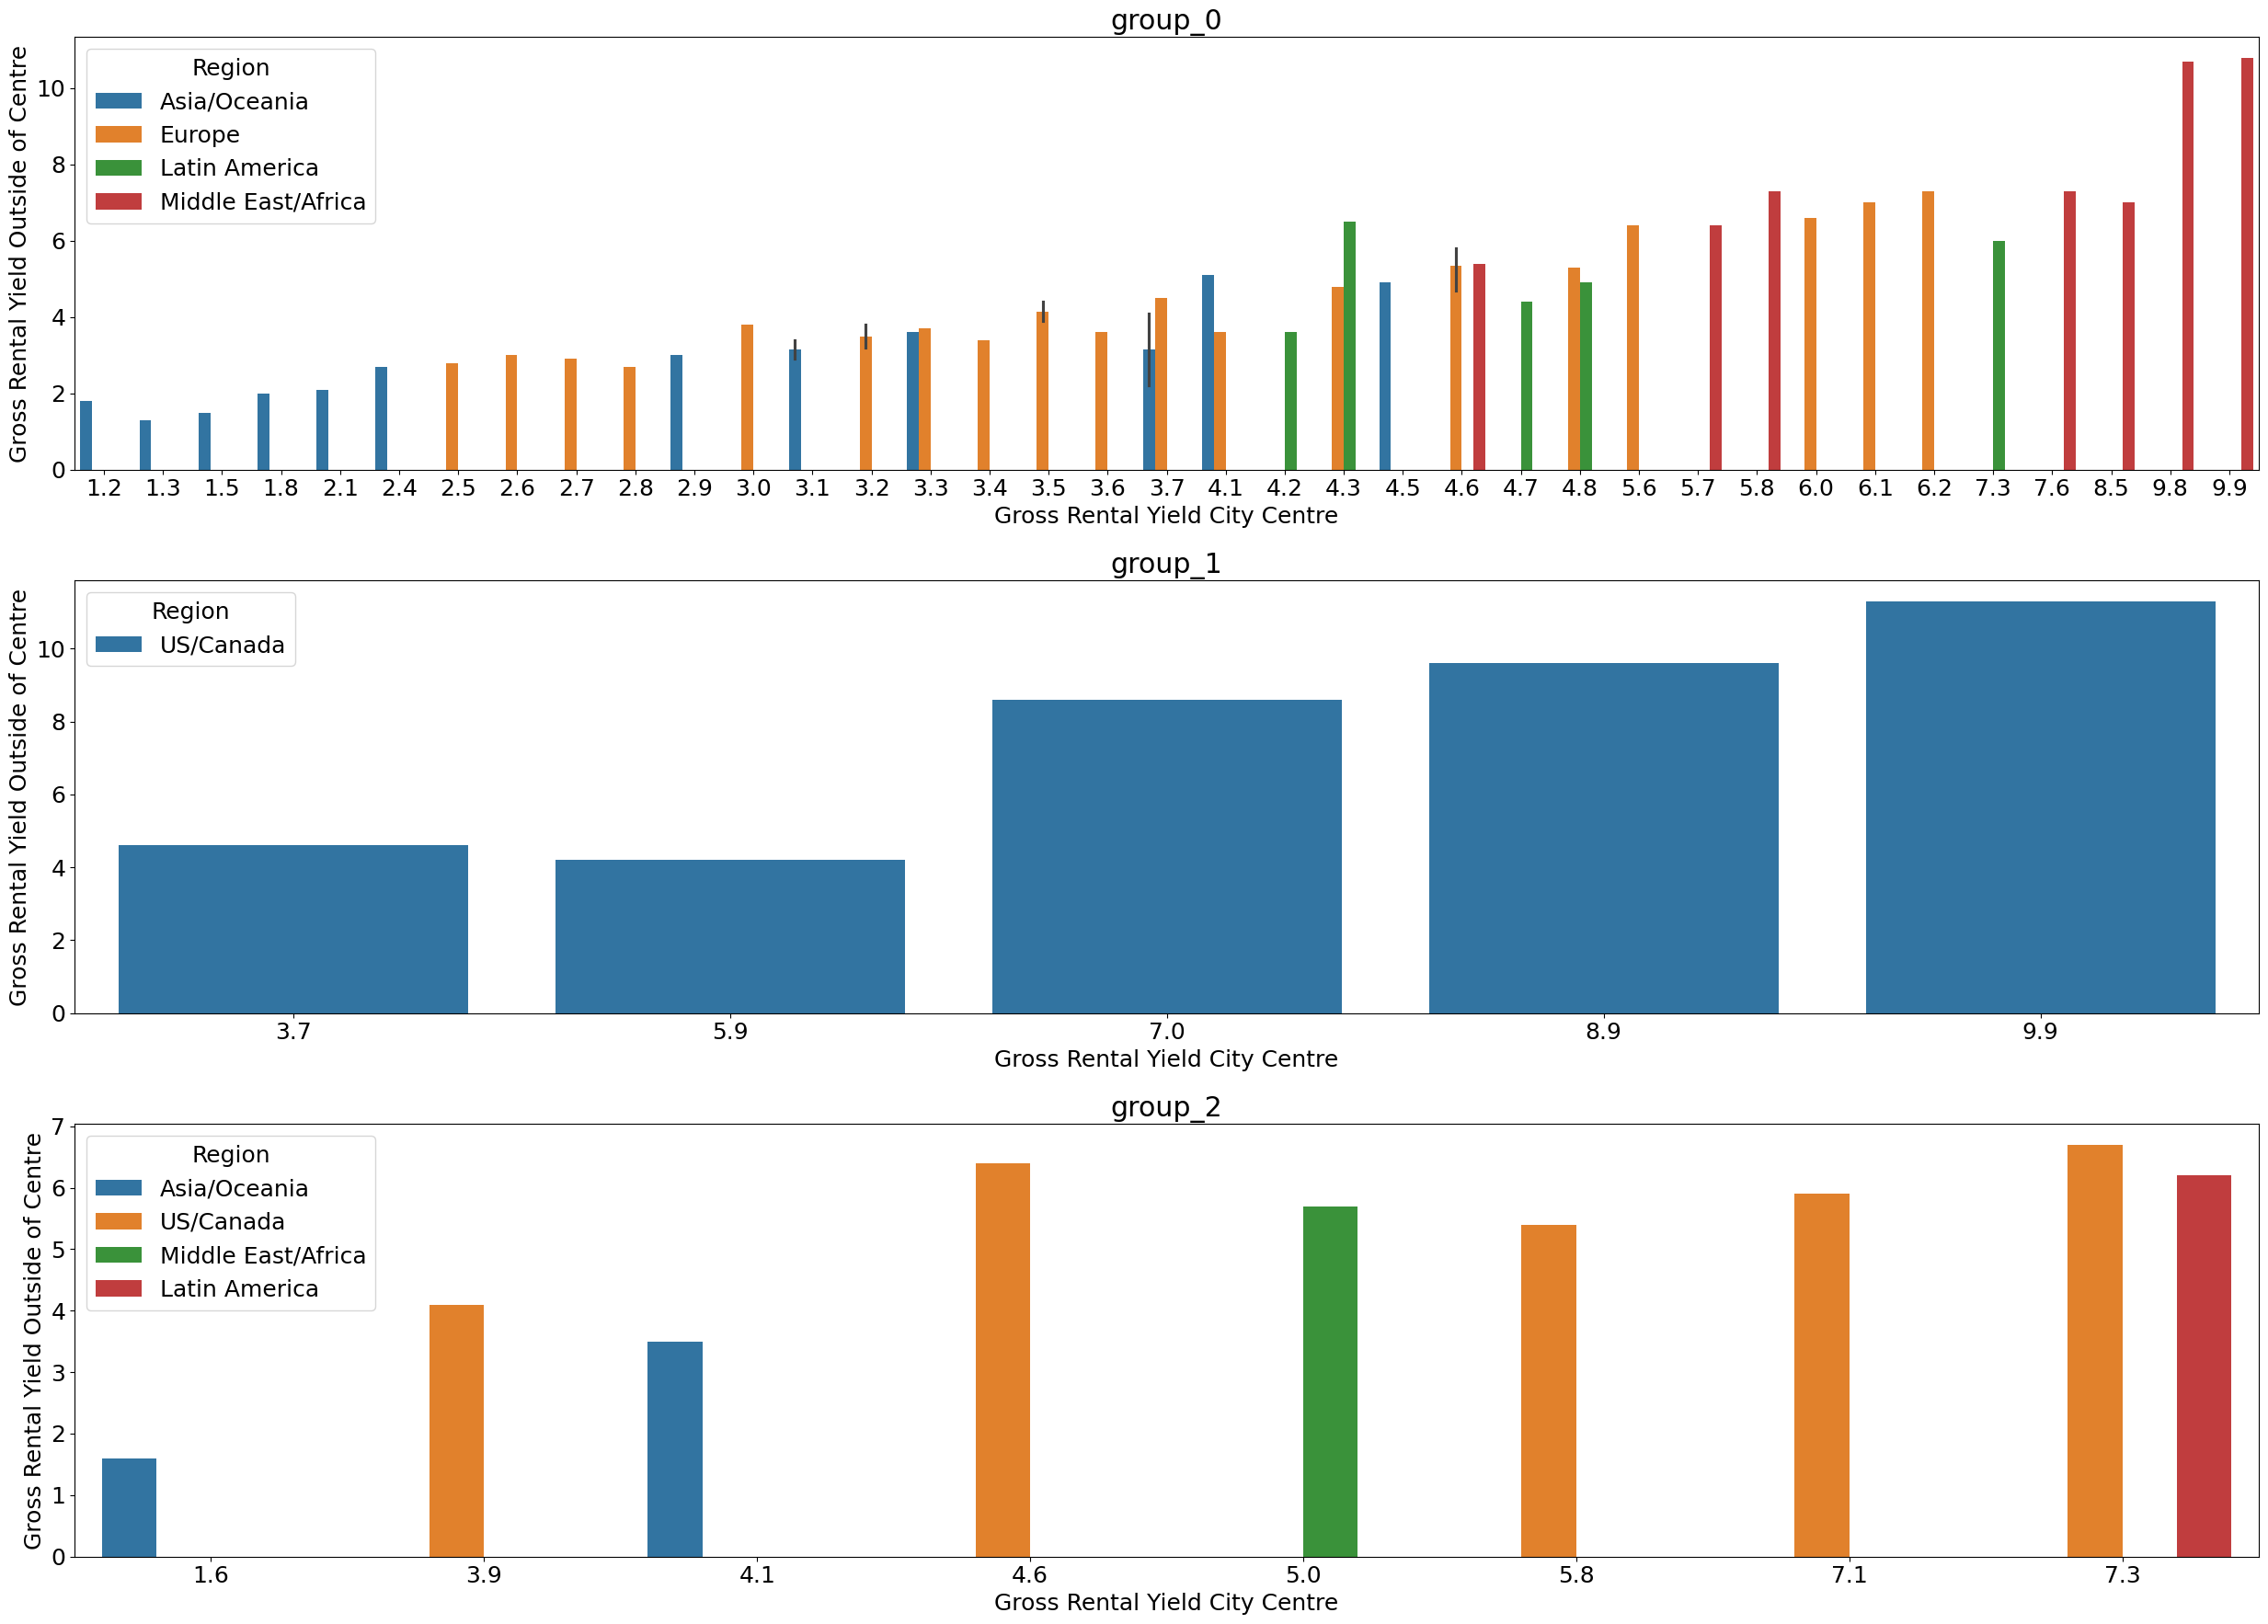

In [327]:
#plotting bar plot for 'Gross Rental Yield City Centre' against 'Gross Rental Yield Outside of Centre' and categorising according to Region

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(25, 18))

# Plot bar plots for each predicted class
sns.barplot(data=group_0, x='Gross Rental Yield City Centre', y="Gross Rental Yield Outside of Centre", ax=axes[0], hue='Region')
sns.barplot(data=group_1, x='Gross Rental Yield City Centre', y="Gross Rental Yield Outside of Centre",  ax=axes[1], hue='Region')
sns.barplot(data=group_2, x='Gross Rental Yield City Centre', y="Gross Rental Yield Outside of Centre",  ax=axes[2], hue='Region')


# Set titles for subplots
axes[0].set_title('group_0')
axes[1].set_title('group_1')
axes[2].set_title('group_2')


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# From the above Bar Plots the following points are observed :

1.   The cluster 0 has overlapping of cites from all the regions, It has countries with the least Gross Rental Yield in the city center in all of the clusters
2.   The cluster 1 has all cities from either US/Canada Region with the highest Gross Rental Yield
3.   The cluster 2 has most of the cities with Gross Rental Yield outside of city center on the higher side.

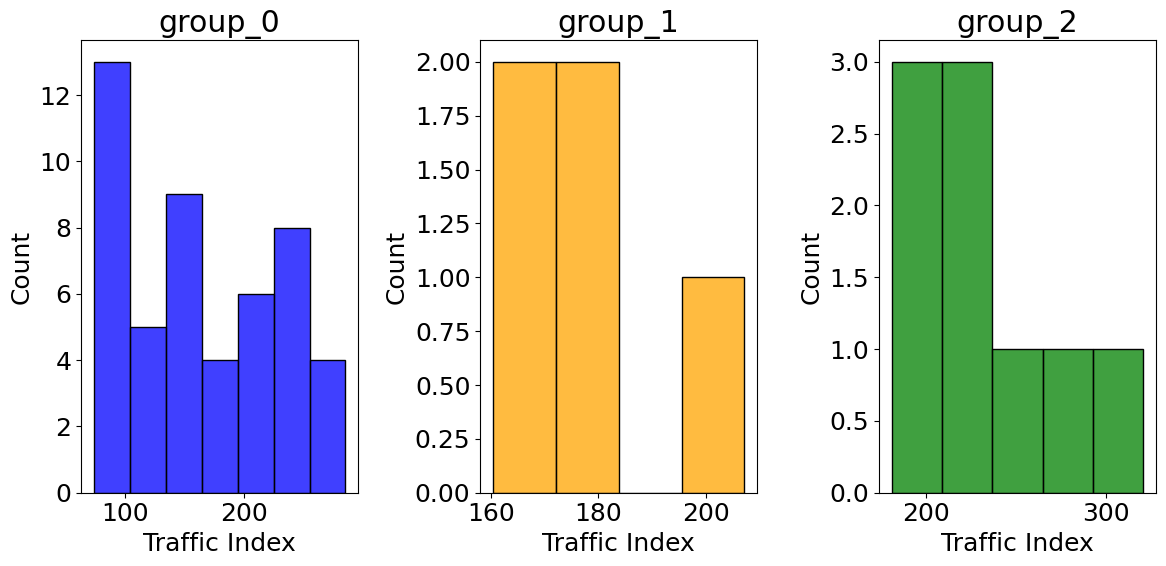

In [328]:
#plotting Histogram for 'Traffic Index' against 'Predicted class'

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

colors = ['blue', 'orange', 'green']

# Plot histograms for each predicted class
sns.histplot(data=group_0, x='Traffic Index', ax=axes[0], color=colors[0])
sns.histplot(data=group_1, x='Traffic Index', ax=axes[1], color=colors[1])
sns.histplot(data=group_2, x='Traffic Index', ax=axes[2], color=colors[2])


# Set titles for subplots
axes[0].set_title('group_0')
axes[1].set_title('group_1')
axes[2].set_title('group_2')


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# From the above Histogram the following points are observed :

1.   The number of cities under cluster 0 have a higher Traffic Index
2.   The cities under the cluster 1 have the least Traffic Index
3.   The cities grouped under cluster 2 majorly have a lesser Traffic Index when compared to cluster 1 but it also includes few countires with moderately higher Traffic than cluster 1


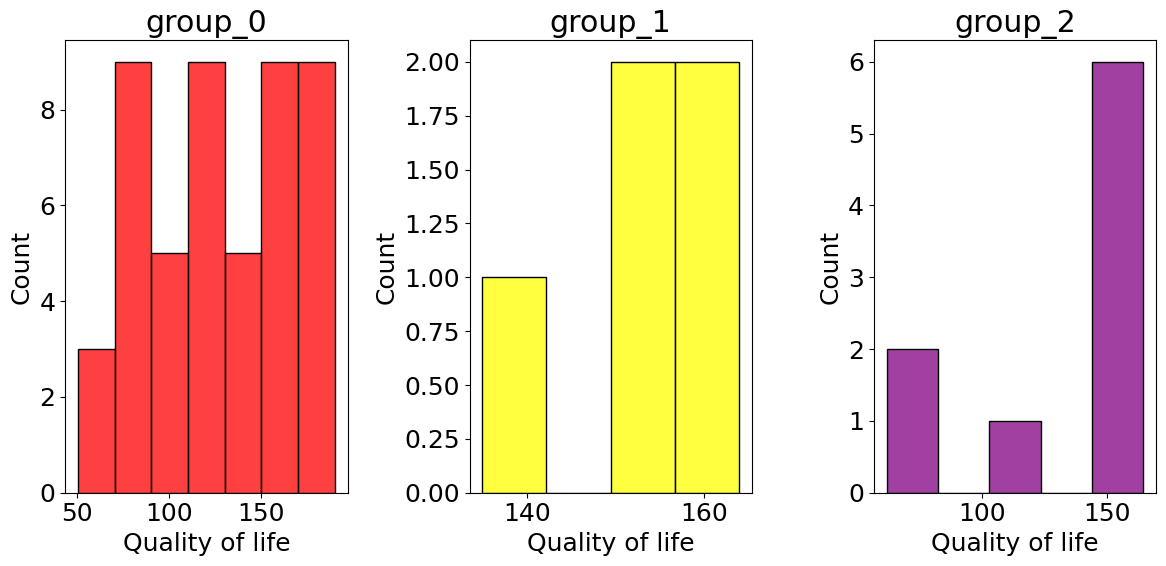

In [329]:
#plotting Histogram for 'Quality of life' against 'Predicted class'

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

colors = ['red', 'yellow', 'purple']

# Plot histograms for each predicted class
sns.histplot(data=group_0, x='Quality of life', ax=axes[0], color=colors[0])
sns.histplot(data=group_1, x='Quality of life', ax=axes[1], color=colors[1])
sns.histplot(data=group_2, x='Quality of life', ax=axes[2], color=colors[2])


# Set titles for subplots
axes[0].set_title('group_0')
axes[1].set_title('group_1')
axes[2].set_title('group_2')


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# From the above Histogram the following points are observed :

1.   The number of cities under cluster 0 have a better quality of life
2.   The cities under the cluster 1 have the least quality of life
3.   Very few cities are grouped under cluster 2, and majority of them have a lesser quality of life



# Steps performed to perform the project :

1. Obtained the dataset and understood the data, Checked if the data contained any missing values
2. Performed Normalization over the data to obtain all values in a similar range
3. Extracted the required data from the dataset and performed elbow method to identify the value of K to further perform K-Means clustering algorithm
4. Calculated the silhouette analysis to verify the K value
5. Performed K-Means clustering to obtain the predicted classes
6. Performed Heirarchical clustering
7. Generated the dendograms with various different linkage criterias
8. Included new attributes such as : 'Traffic Index', 'Gross Rental Yield City Centre', 'Gross Rental Yield Outside of Centre', and 'Quality of life' to compare the Clustering results.
9. Generated various visualizations to analyze the clustering results with the new attributes considered.
10. Analyzed the insights from the visualizations.


#Challenges Faced :

* One of the challenges faced was to consider the optimal value of K by using the Elbow method as this resulted in both values 2 and 3 where the graph forms an elbow.
* Another challenge was to consider a new dataset with additional attributes for comparison with the analysis of clustering, as they had didn't have the required data for all the cities considered in the original dataset for clustering.
* Third challenge was the find additional attributes which aliged with the original dataset on street orientation network for comparison.


# Conclusion :

# Cluster 0
* The number of cities grouped under cluster 0 are more, they are mostly disordered and hence have lower orientation entropy. They also have a high number of dead ends and higher four way intersections compared to other clusters. The European and Latin American cities in this cluster have the higest traffic Index. Most cities in this cluster have lesser gross rental yield in the city center than outside the city . Additionally these cities have higher traffic index and quality of life in general

# Cluster 1
* The cities grouped under cluster 1 are mostly better ordered than cluster 0 and moderate orientation entropy. They also have a less number of dead ends and higher four way intersections compared to other clusters which is good for better street orientation. The US and Canadian cities in this cluster have the higest traffic Index. Most cities in this cluster have higher gross rental yield outside the city center than in the city . Additionally these cities have least traffic index and quality of life in general

#Cluster 2
* The cities grouped under cluster 2 are mostly best ordered and hence have higher orientation entropy. They also have a less number of dead ends and less four way intersections compared to other clusters. The US and Canadian cities in this cluster have the higest traffic Index. Most cities in this cluster have higher gross rental yield outside the city than in the city center. Additionally these cities have moderate traffic index and quality of life in general